# Goal of this Analysis

1. Are there any null values or outliers? How will you handle them?

2. What factors are significantly related to the number of web purchases?

3. Which marketing campaign was the most successful?

4. What does the average customer look like?

5. Which products are performing best?

6. Which channels are underperforming?

In [1]:
#Importing useful and important libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading file

df = pd.read_csv("/kaggle/input/marketing-dataset/marketing_data.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India


In [3]:
#To get information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#To show all the name of columns

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
#Renaming income column; just by removing the space

df.rename(columns ={' Income ': 'Income'}, inplace = True)

In [6]:
#Getting the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 1. Are there any null values or outliers? How will you handle them?

In [11]:
#Checking for null values

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
df['Income'].isnull().sum()

24

We can see there are 24 values null values in "Income" column. 

In [14]:
#Dropping the null values to get more precise answer

df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India


**Handling Outlier**

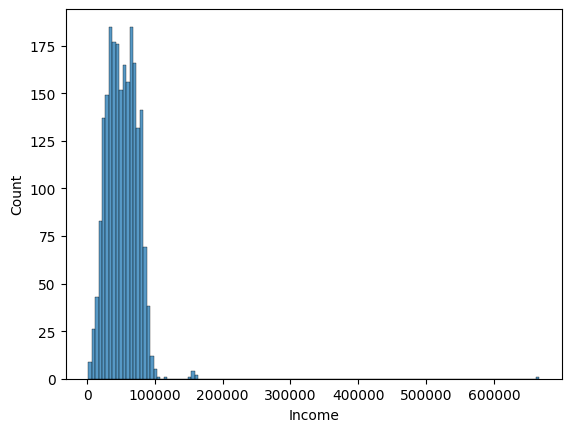

In [7]:
#checking the distribution of income through this plot

sns.histplot(data = df, x = 'Income')
plt.show()

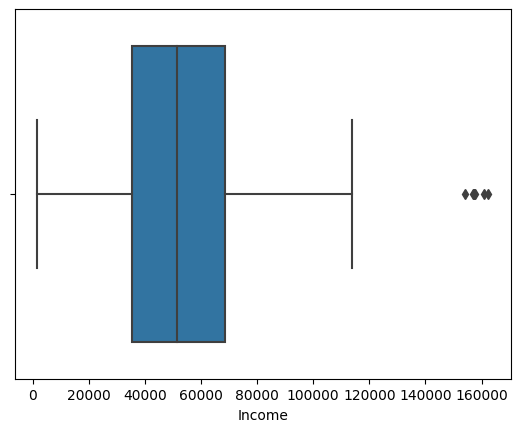

In [8]:
#Removing outlier

df = df[df['Income'] <= 200000]
sns.boxplot(data = df, x = 'Income')
plt.show()

# 2. What factors are significantly related to the number of web purchases?

In [9]:
df['age'] = 2012-df['Year_Birth']

/tmp/ipykernel_42/1221633388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2012-df['Year_Birth']


In [11]:
df = df[df['age']<70]
bins = [15, 20, 30, 40,50,60]
names = ['<20', '20-30', '30-40', '40-50', '50-60','60-70']
d = dict(enumerate(names, 1))
df['agerange'] = np.vectorize(d.get)(np.digitize(df['age'], bins))

In [12]:
df['agerange'].value_counts()

agerange
30-40    614
40-50    613
50-60    458
20-30    283
60-70    227
<20       15
Name: count, dtype: int64

Text(0.5, 1.0, 'Customers Age Group')

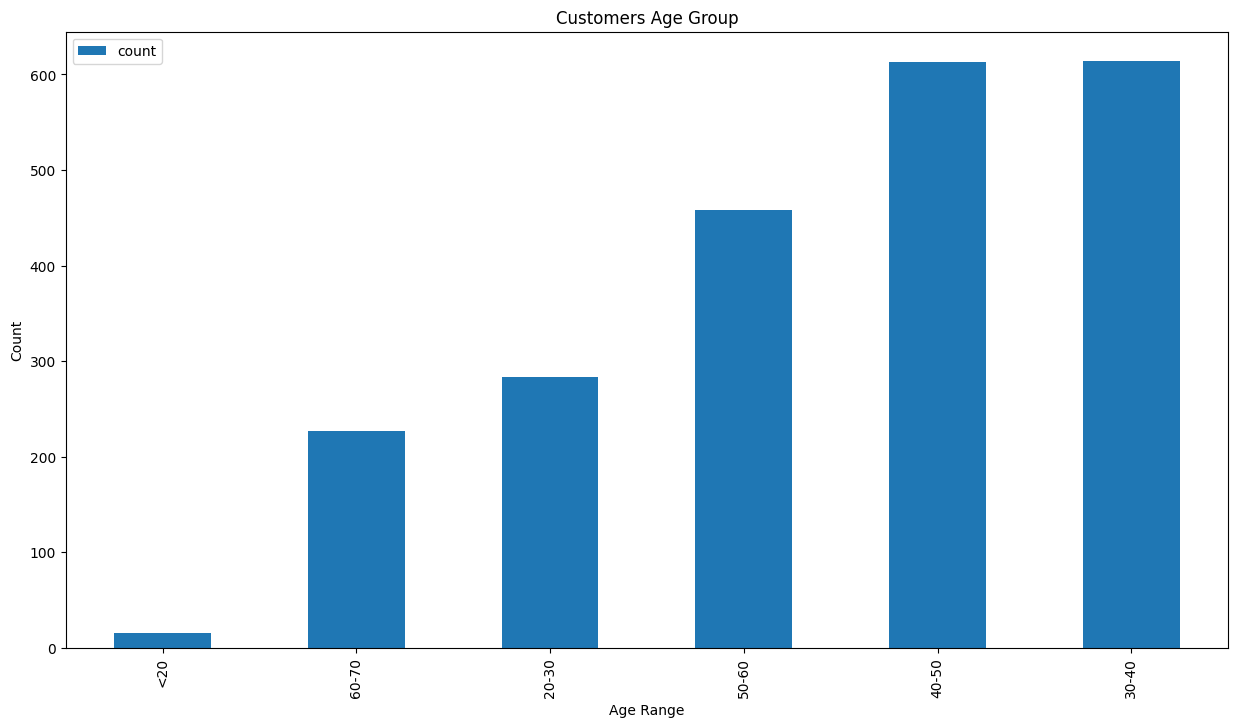

In [14]:
ager_df = df.groupby('agerange').agg({
    'agerange': lambda x: len(x)
})
ager_df.rename(columns = {'agerange': 'count'}, inplace = True)
ager_df.sort_values('count').plot(kind = 'bar',figsize = (15,8))
plt.xlabel('Age Range')    
plt.ylabel('Count')
plt.title('Customers Age Group')

# 3. Which marketing campaign was the most successful?

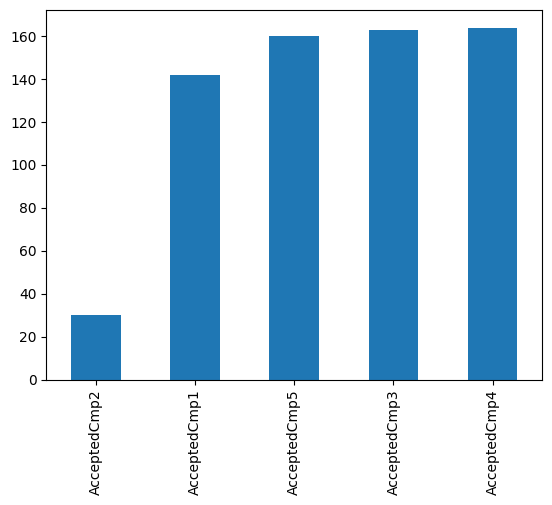

AcceptedCmp2     30
AcceptedCmp1    142
AcceptedCmp5    160
AcceptedCmp3    163
AcceptedCmp4    164
dtype: int64

In [15]:
#Adding values in each campaign 

campaign_df = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
campaign_df.sum().sort_values().plot(kind = 'bar')
plt.show()
campaign_df.sum().sort_values()

# 4. What does the average customer look like?

Text(0.5, 1.0, 'Customers Age Group')

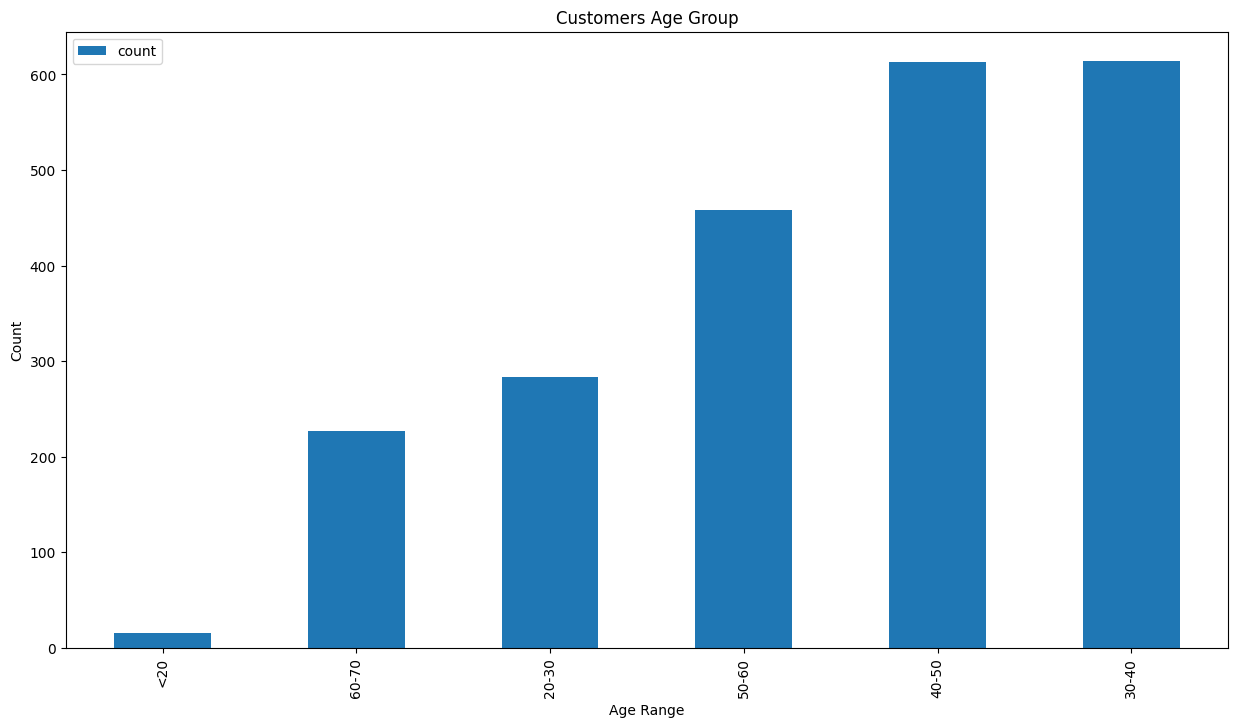

In [17]:
ager_df = df.groupby('agerange').agg({
    'agerange': lambda x: len(x)
})
ager_df.rename(columns = {'agerange': 'count'}, inplace = True)
ager_df.sort_values('count').plot(kind = 'bar',figsize = (15,8))
plt.xlabel('Age Range')    
plt.ylabel('Count')
plt.title('Customers Age Group')

# 5. Which products are performing best?

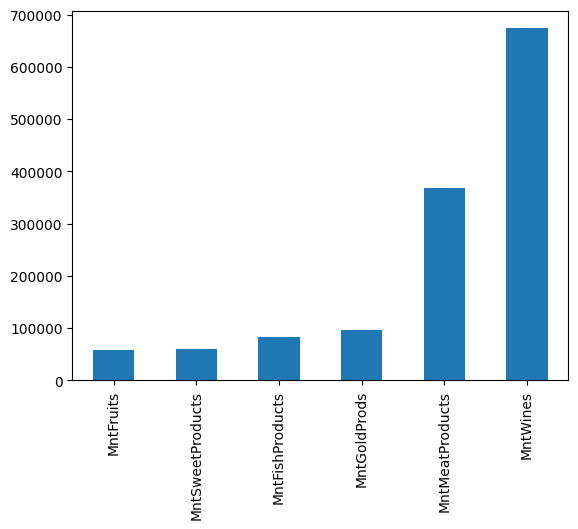

MntFruits            58199
MntSweetProducts     59827
MntFishProducts      83224
MntGoldProds         97137
MntMeatProducts     368747
MntWines            673867
dtype: int64

In [19]:
#Making sum of all values for each category

product_df = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_df.sum().sort_values().plot(kind = 'bar')
plt.show()
product_df.sum().sort_values()

# 6. Which channels are underperforming?

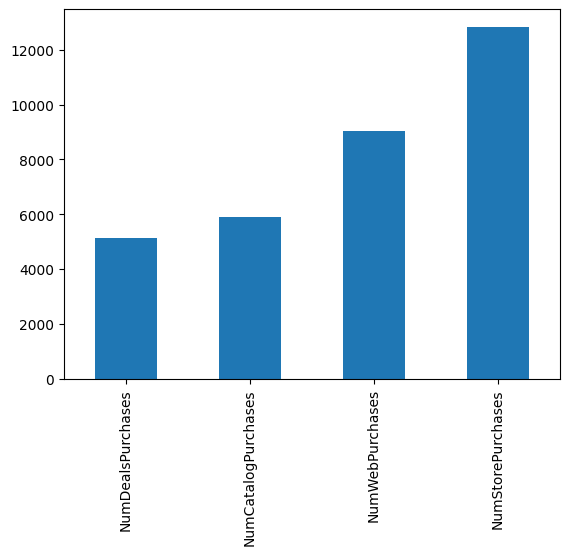

NumDealsPurchases       5141
NumCatalogPurchases     5900
NumWebPurchases         9033
NumStorePurchases      12835
dtype: int64

In [22]:
#summing up the values in each product

channel_df = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
channel_df.sum().sort_values().plot(kind = 'bar')
plt.show()
channel_df.sum().sort_values()